In [1]:
import numpy as np
import math
import os
# import imageio
from barrier3d import Barrier3d
from cascade.outwasher_reorg_backwaterSHORT import Outwasher
from cascade.outwasher_reorganized import (plot_ElevAnimation, plot_DischargeAnimation, plot_SlopeAnimation, 
plot_Qs2Animation, plot_SedOutAnimation, plot_SedInAnimation)
import matplotlib.pyplot as plt
import imageio
import csv

In [2]:
with open(r"C:\Users\Lexi\Documents\Research\Outwasher\chris stuff\sound_data.txt", newline='') as csvfile:
    sound_data = list(csv.reader(csvfile))[0]
sound_data = [float(s) / 10 - 0.054 for s in sound_data]  # [dam MHW] Chris' sound elevations were in m MSL,
# so converted to NAVD88 then MHW and dam
sound_data = [s + 0.05 for s in sound_data]  # [dam MHW] just increasing the values
# setting all negative values to 0
sound_data = sound_data[20:]
# for index, value in enumerate(sound_data):
#     #     # smaller used 0.05
#     if value > 0.220:
#         sound_data[index] = 0.220
sound_data[0] = 0

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    calculate rexcess as the average difference between the bay elevations and the dune toe
</div>

In [3]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_backwaterSHORT_fullhydro_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
Starting discharge is: 112.60589194763732
discharge at dune gaps after flow routing: [51.2942827  90.28310596 77.11620549 81.73975995 81.17417219 83.82637792
 66.73266493 72.8567535  72.30371536 78.05938758 71.20627557 81.14859232
 72.25821802 78.7397661  73.58659604 73.2497129  65.95969429 75.06994053
 80.33763992 66.52506949 84.32527056 81.12215314 78.28170507 74.60812518
 70.05465003 75.04064401 81.82146332 66.96460734 77.95622887 71.76689331
 64.44052704 80.37450143 76.7319794  79.64819039 85.31625304 76.0660144
 61.76000549 69.9924015  77.42532095 80.57971551 82.05400044 63.02175633
 81.81631343 70.70978957 74.69188098 68.15445448 84.53895753 72.5755086
 89.16352532 55.57332842]
7
Starting discharge is: 117.11339701907436
discharge at dune gaps after flow routing: [ 49.05321111 104.6090785   85.68803272  89.83437336  89.56792095
 102.39297137  69.9824316   86.28801747  86.24436011  91.1801857
  80.24944642  92.46579854  81.26584481  91.03788659  90.82061959
  87.6280

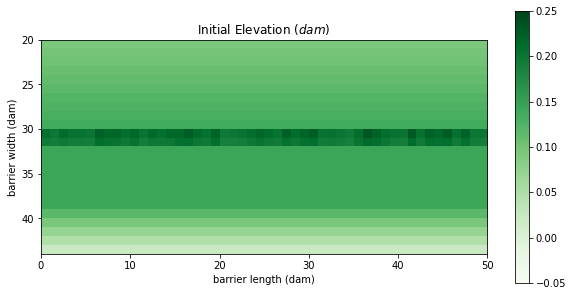

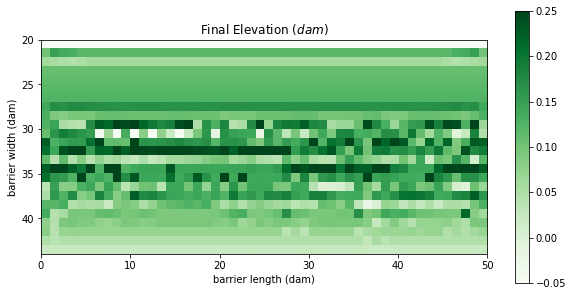

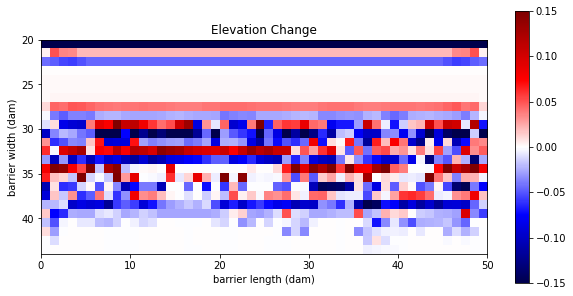

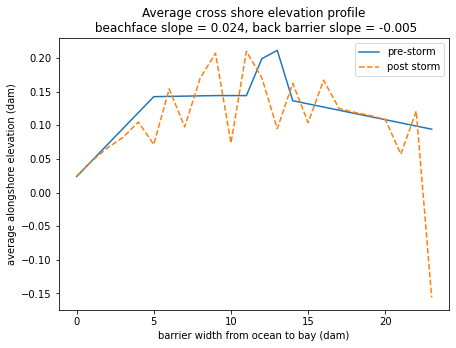

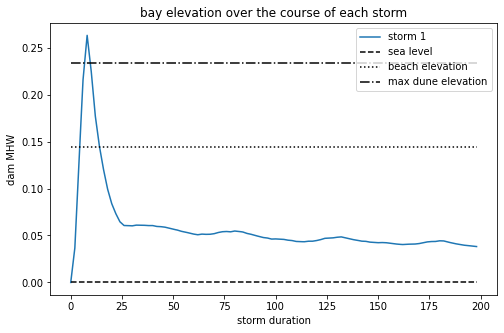

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [4]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    extent=[0, outwash._length, np.shape(initial_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 20, Cx = 10, Ki = 7.5x10$^{-3}$.
</div>

In [5]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_backwaterSHORT_fullhydro_Kie-3_substep20"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=20, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
Starting discharge is: 77.41648823971731
discharge at dune gaps after flow routing: [35.2647909  62.06958526 53.01734849 56.19603962 55.80719835 57.63058831
 45.87867012 50.08897761 49.7087642  53.66578565 48.95427495 55.7896122
 49.6774848  54.13354551 50.59074395 50.35913698 45.34725323 51.61054246
 55.23208287 45.73594836 57.97357673 55.77143527 53.81862881 51.29304467
 48.16253303 51.59040112 56.25221064 46.0381304  53.59486409 49.33969934
 44.30282659 55.25742514 52.75319326 54.7580867  58.65487663 52.2953427
 42.45996951 48.1197372  53.22986519 55.39850971 56.41207978 43.32742251
 56.24867009 48.6129411  51.35062674 46.85614964 58.1204864  49.8956219
 61.29987419 38.20663246]
57
Starting discharge is: 83.82575627617292
discharge at dune gaps after flow routing: [37.8687434  71.12224558 57.71108046 61.74784002 61.48066273 

discharge at dune gaps after flow routing: [  0.         354.50015138   0.           0.         291.30565975
 300.12746518  14.94100785  11.73823531  53.33179318  53.48512883
 316.07541894 294.00739555   0.         203.64344776 233.282581
   0.           0.          49.33818074 393.77944527   0.
 301.7003771    0.         365.54845982  19.59954338  88.58130235
 135.23134432 186.51210239  39.9890029  201.62566959   0.
   0.         403.47424709  95.70736634 109.10378639 267.90310406
  80.85909826  38.75395148  50.28423718  60.41777169 296.25741239
 290.16836884   0.         193.23202207 230.20739482   0.
  97.9640363    0.           0.         528.83154784   0.        ]
70
Starting discharge is: 171.66562196788348
discharge at dune gaps after flow routing: [  0.         518.04670592   0.           0.         195.00129413
 310.16324508  17.70891856  22.3443531   68.25552711  47.40107879
 284.70447833 301.59480895   0.         227.48739519 258.06092702
   0.           0.          63.48670

discharge at dune gaps after flow routing: [ 33.13768669  76.3201343  504.0485771    0.           0.
 852.06208735   0.           0.         223.25904007   0.
  42.8309167  419.66429871   0.         434.42959738 395.96674706
   7.96686569  25.06510905 203.6297417   75.66988029  33.97500071
 458.1863716  131.98997955 122.96167245 189.62345497 110.67765083
 211.49660018 174.89766801 145.87327741  25.23165312 695.48956577
   0.          14.51242753 153.10034317 316.94334803 135.53462046
 261.10800569   2.0978059   41.23045213  66.5634475  157.23884213
 647.67464491   0.         313.67153002 304.91677077   0.
 338.13881854   0.           0.         461.66405717   0.        ]
82
Starting discharge is: 234.71281285900344
discharge at dune gaps after flow routing: [ 70.18416288 210.18049329  85.99627467 261.83364676   0.
 493.94558828   0.           0.         409.61171503   0.
 108.38204403 324.32946361   0.         450.98418047 394.41415232
   0.           0.         315.15639912 121.385453

93
Starting discharge is: 197.72432048849325
discharge at dune gaps after flow routing: [ 61.40785909  50.60062405 264.39141865 183.95519456 129.73804863
 206.05539361   0.           0.         372.19719638   0.
  22.64514669 411.19340269   0.         360.05230611 247.46358665
   0.           0.         155.02083021 103.99297852 150.12697257
  98.58510369  94.51507173 151.93367937 101.03595761 158.44581236
 250.59317712 110.21273098  86.53623447  89.14450922 192.70773483
   0.          69.28398496 274.08367397 321.5270758  133.6406334
 261.62438391   0.           0.         154.15115355 169.27036627
 201.06011527   0.          78.85732388  96.39475338   0.
 650.13334099   0.           0.         309.36597159   0.        ]
94
Starting discharge is: 194.63939750068212
discharge at dune gaps after flow routing: [ 41.36183669 144.91925413 341.4097226    4.73060226 222.38079911
 187.55875719   0.           0.         281.21022723   0.
  29.34730184 402.62976654   0.         385.92162011 214

discharge at dune gaps after flow routing: [ 58.39969741  36.80526501 180.44969681 165.04852823 109.11614134
 191.71897955  27.8488659   41.46710463 149.50702963  22.73053976
 144.16305764 420.40293519   0.         253.28835607  68.94562993
   0.           0.         172.16386368  81.57619438 162.75471125
  34.73692673 134.9466313  133.62622982  28.18843179 155.61273217
 159.3075329  122.41629509 171.348262   154.50763125 139.26124052
   0.           0.         353.1018859   80.92930484 345.04587956
  16.17583884   0.           0.         283.5668233   92.17664759
 123.49703373   0.         129.33195678   0.         164.14012456
 253.38617462   0.           0.         390.65407065   0.        ]
106
Starting discharge is: 166.03087608465898
discharge at dune gaps after flow routing: [122.13587805  91.24372473 211.81989092  87.56293998  30.47020896
 207.12068287  13.87523633  23.61644327  84.91754407  14.25108138
 160.42194972 424.29521543   0.         226.49516355 107.51465225
   0.    

1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
The sediment volume lost in storm 1 was 44.196 dam^3
The total sediment volume lost was 44.196 dam^3


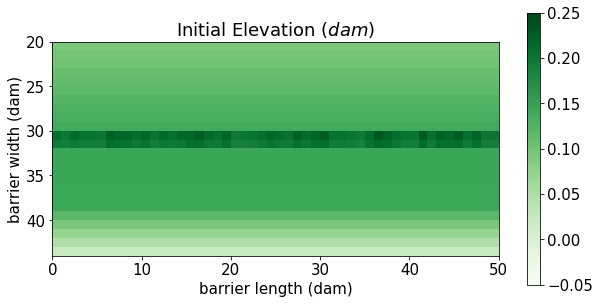

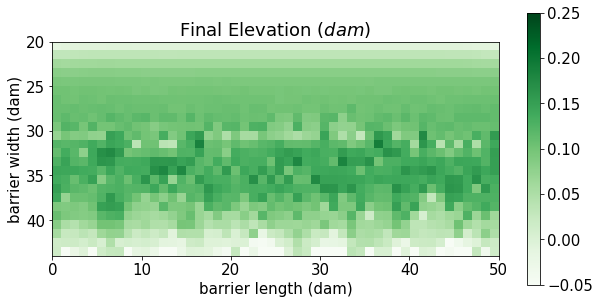

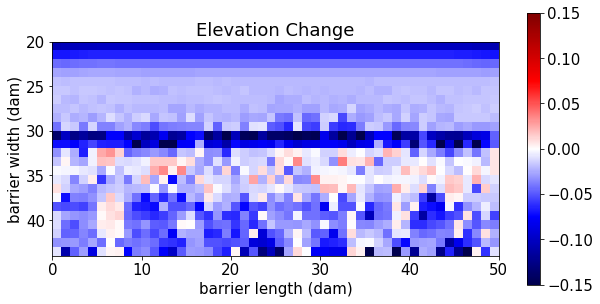

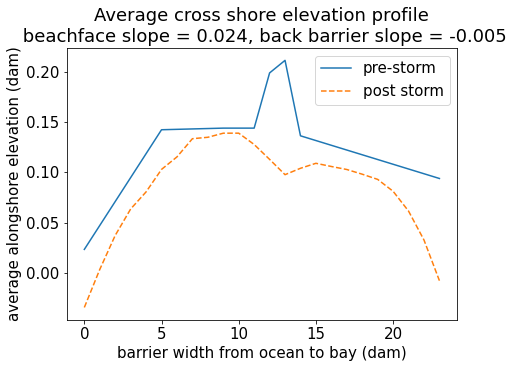

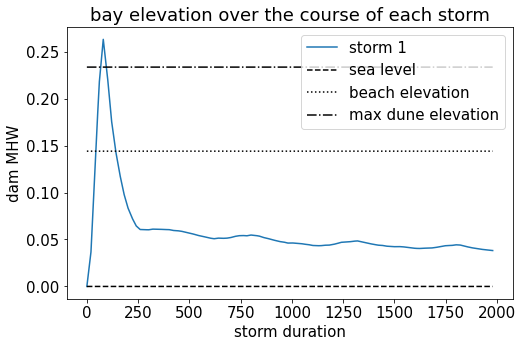

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [6]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    extent=[0, outwash._length, np.shape(initial_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    extent=[0, outwash._length, np.shape(final_domain)[0]+20, 20],
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)